In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# NBA season we will be analyzing
year = 2018
# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [3]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
#assign dataframe to URL grab
df1 = pd.DataFrame(player_stats, columns = headers)
df1.head

<bound method NDFrame.head of             Player Pos Age   Tm   G  GS    MP   FG  FGA   FG%  ...   FT%  ORB  \
0     Álex Abrines  SG  24  OKC  75   8  15.1  1.5  3.9  .395  ...  .848  0.3   
1       Quincy Acy  PF  27  BRK  70   8  19.4  1.9  5.2  .356  ...  .817  0.6   
2     Steven Adams   C  24  OKC  76  76  32.7  5.9  9.4  .629  ...  .559  5.1   
3      Bam Adebayo   C  20  MIA  69  19  19.8  2.5  4.9  .512  ...  .721  1.7   
4    Arron Afflalo  SG  32  ORL  53   3  12.9  1.2  3.1  .401  ...  .846  0.1   
..             ...  ..  ..  ...  ..  ..   ...  ...  ...   ...  ...   ...  ...   
685   Tyler Zeller   C  28  BRK  42  33  16.7  3.0  5.5  .546  ...  .667  1.5   
686   Tyler Zeller   C  28  MIL  24   1  16.9  2.6  4.4  .590  ...  .895  2.0   
687    Paul Zipser  SF  23  CHI  54  12  15.3  1.5  4.3  .346  ...  .760  0.2   
688     Ante Žižić   C  21  CLE  32   2   6.7  1.5  2.1  .731  ...  .724  0.8   
689    Ivica Zubac   C  20  LAL  43   0   9.5  1.4  2.8  .500  ...  .765  1.0  

In [6]:
#Create a list of column names to change for easier access
list_of_names3 = ['Player', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [7]:
#assign our list from above to column names given
df1.columns = list_of_names3

In [8]:
#Create a subset of columns in order to merge later
newSubsetDf = df1[['Team', "Pos"]].copy()

In [9]:
newSubsetDf

,Team,Pos
0,OKC,SG
1,BRK,PF
2,OKC,C
3,MIA,C
4,ORL,SG
...,...,...
685,BRK,C
686,MIL,C
687,CHI,SF
688,CLE,C


In [10]:
#inner merge on two columns
mergedDf = pd.merge(df1, newSubsetDf, on=['Team', "Pos"])

In [11]:
#two columns worked 
mergedDf

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
3,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
4,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,Otto Porter,SF,24,WAS,77,77,31.6,5.8,11.5,.503,...,.828,1.3,5.1,6.4,2.0,1.5,0.5,1.0,2.0,14.7
4058,Otto Porter,SF,24,WAS,77,77,31.6,5.8,11.5,.503,...,.828,1.3,5.1,6.4,2.0,1.5,0.5,1.0,2.0,14.7
4059,Devin Robinson,SF,22,WAS,1,0,13.0,1.0,3.0,.333,...,,2.0,3.0,5.0,0.0,1.0,0.0,0.0,2.0,2.0
4060,Devin Robinson,SF,22,WAS,1,0,13.0,1.0,3.0,.333,...,,2.0,3.0,5.0,0.0,1.0,0.0,0.0,2.0,2.0


In [12]:
newestSubsetDf = df1["FG%"].copy()

In [13]:
#inner merge on one columns between already merged data and a new subset of data
newMergedDf = pd.merge(newestSubsetDf, mergedDf, on=["FG%"])

In [14]:
#it worked
newMergedDf

,FG%,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
3,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
4,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32420,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32421,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32422,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32423,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


In [15]:
import sqlite3
# Create your connection.
cnx = sqlite3.connect(':memory:')

In [16]:
newMergedDf.to_sql(name='DfStorage', con=cnx)

In [17]:
p2 = pd.read_sql('select * from DfStorage', cnx)

In [18]:
p2

,index,FG%,Player,Pos,Age,Team,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,1,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,2,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
3,3,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
4,4,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32420,32420,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32421,32421,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32422,32422,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32423,32423,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


In [19]:
newMergedDf["FG%"] = newMergedDf['FG%'].sort_values(ascending=False)

In [20]:
newMergedDf

,FG%,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
3,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
4,.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32420,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32421,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32422,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32423,.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


In [21]:
newMergedDf["FG%"] = pd.to_numeric(newMergedDf["FG%"], errors='coerce')

In [22]:
newMergedDf["FG%"] = newMergedDf["FG%"].dropna()

In [23]:
#create new df without blank characters
newMergedDf["FG%"] = newMergedDf["FG%"][newMergedDf["FG%"]!= '']

In [24]:
newMergedDf["FG%"] = newMergedDf["FG%"].apply(lambda x : float(x))

In [25]:
#drop the outliers
newMergedDf["FG%"] = newMergedDf["FG%"].loc[(newMergedDf["FG%"]!=1.0)]

In [26]:
#drop the outliers
newMergedDf["FG%"] = newMergedDf["FG%"].loc[(newMergedDf["FG%"]!=0.0)]

In [27]:
newMergedDf["FG"] = pd.to_numeric(newMergedDf["FG"], errors='coerce')

In [28]:
newMergedDf["FG"] = newMergedDf["FG"].dropna()

In [29]:
#create new df without blank characters
newMergedDf["FG"] = newMergedDf["FG"][newMergedDf["FG"]!= '']

In [30]:
newMergedDf["FG"] = newMergedDf["FG"].apply(lambda x : float(x))

In [ ]:
#determine outlier in the data
import numpy as np
import matplotlib.pyplot as plt
#seed(1)

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(newMergedDf["FT%"])
    random_data_mean = np.mean(newMergedDf["FT%"])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in newMergedDf["FT%"]:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(newMergedDf["FT%"])

In [31]:
#drop the outliers
newMergedDf["FG"] = newMergedDf["FG"].loc[(newMergedDf["FG"]!=1.0)]

In [32]:
#drop the outliers
newMergedDf["FG"] = newMergedDf["FG"].loc[(newMergedDf["FG"]!=0.0)]

In [33]:
newMergedDf["FT%"] = pd.to_numeric(newMergedDf["FT%"], errors='coerce')

In [34]:
newMergedDf["FT%"] = newMergedDf["FT%"].dropna()

In [35]:
#create new df without blank characters
newMergedDf["FT%"] = newMergedDf["FT%"][newMergedDf["FT%"]!= '']

In [36]:
newMergedDf["FT%"] = newMergedDf["FT%"].apply(lambda x : float(x))

In [37]:
#drop the outliers
newMergedDf["FT%"] = newMergedDf["FT%"].loc[(newMergedDf["FT%"]!=1.0)]

In [38]:
#drop the outliers
newMergedDf["FT%"] = newMergedDf["FT%"].loc[(newMergedDf["FT%"]!=0.0)

SyntaxError: unexpected EOF while parsing (<ipython-input-38-78f18e783179>, line 2)

In [39]:
import matplotlib.pyplot as plt

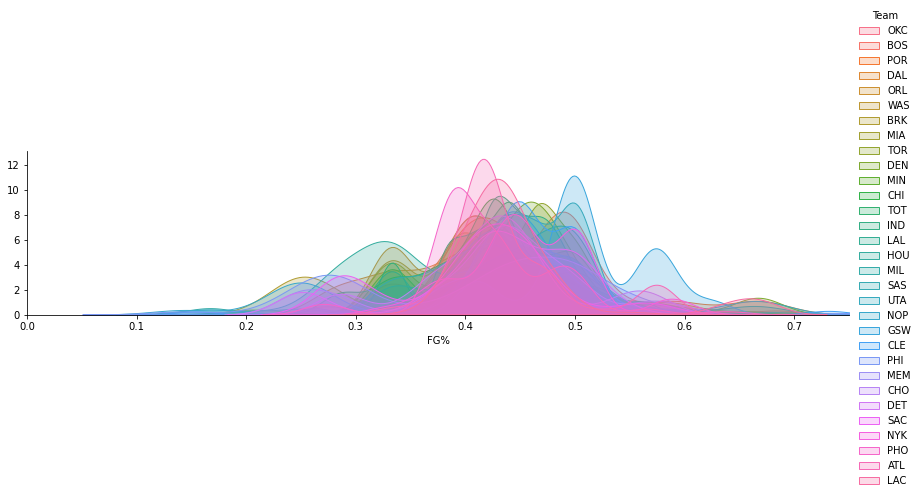

In [40]:
#Field goal Percentage by team
facet = sns.FacetGrid(newMergedDf,hue="Team", aspect=4)
facet.map(sns.kdeplot, 'FG%', shade=True)
facet.set(xlim=(0,newMergedDf['FG%'].max()))
facet.add_legend()

plt.show()

(array([  74.,  328.,  521., 2009., 5607., 4041.,  580.,  329.,  152.,
          14.]),
 array([0.143 , 0.2037, 0.2644, 0.3251, 0.3858, 0.4465, 0.5072, 0.5679,
        0.6286, 0.6893, 0.75  ]),
 <BarContainer object of 10 artists>)

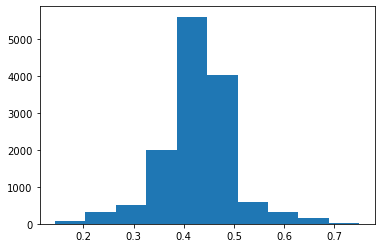

In [41]:
#a beautiful well distributed graph of Field Goal Percentages with no outliers
plt.hist(newMergedDf['FG%'])

<AxesSubplot:title={'center':'FG%'}, xlabel='Team'>

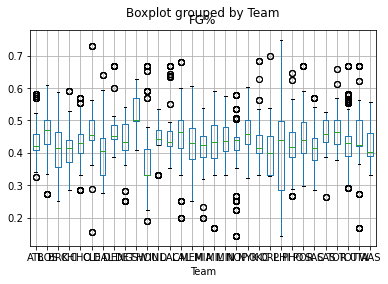

In [42]:
#Uglyt boxplot graph of FG% by team
newMergedDf.boxplot(column='FG%', by='Team')

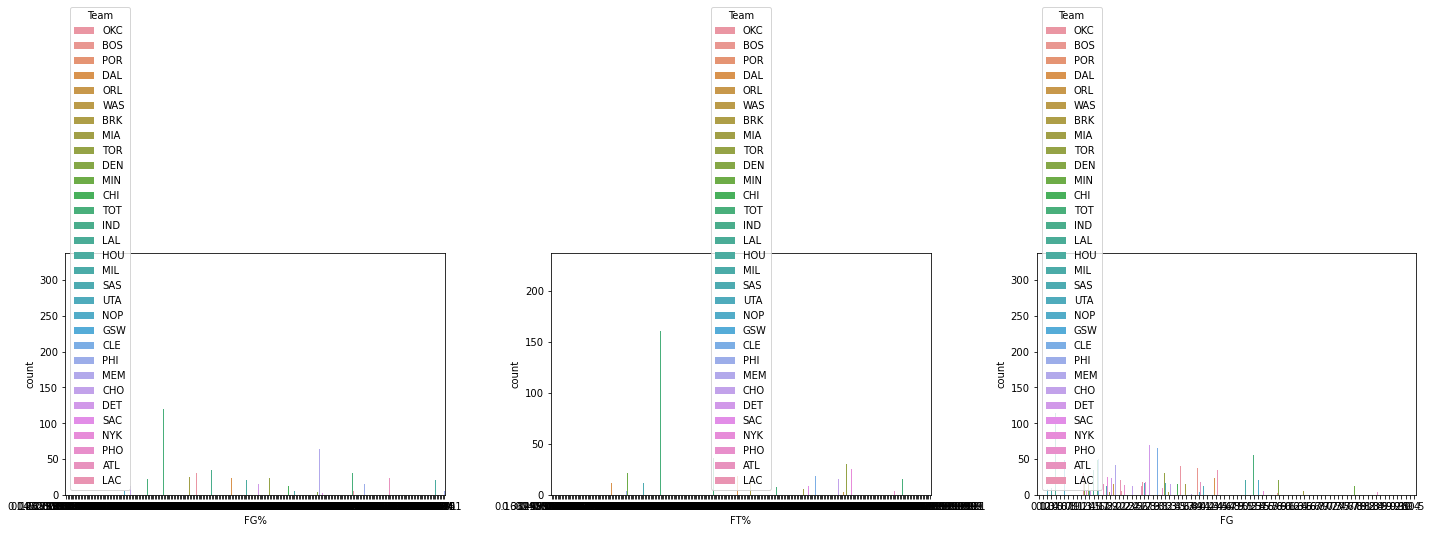

In [43]:
#plots for field goal percentage, free throw percentage and fielf goals by team
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x=newMergedDf['FG%'], hue=newMergedDf['Team'], data=newMergedDf)
plt.subplot(3,3,2)
sns.countplot(x=newMergedDf['FT%'], hue=newMergedDf['Team'], data=newMergedDf)
plt.subplot(3,3,3)
sns.countplot(x=newMergedDf['FG'], hue=newMergedDf['Team'], data=newMergedDf)

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


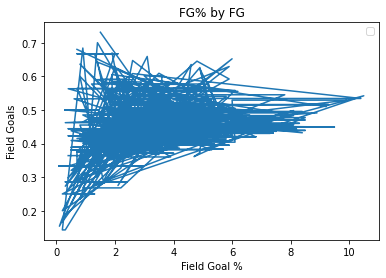

In [50]:
#Field goals by Field Goal Percentages
x = newMergedDf["FG"]
y = newMergedDf["FG%"]
plt.xlabel('Field Goal %')
plt.ylabel('Field Goals')
plt.title('FG% by FG')
plt.legend()
plt.plot(x, y)
#by person, pick top couple and make those graphs

In [51]:
newMergedDf

,FG%,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,0.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,0.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
3,0.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
4,0.395,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32420,0.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,0.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32421,0.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,0.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32422,0.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,0.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
32423,0.731,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,0.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7
